# Question 2

This question helps you get familiar with some basics of IPython notebooks, numpy and matplotlib.

## 2A Markdown

Here is a [markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) (quick reference).

You can generate $\LaTeX$ math in markdown ([here](https://ipython.org/ipython-doc/3/notebook/notebook.html#markdown-cells) is the documentation).

Play with different markdowns a bit yourself? Hope you will be able to generate some beautiful notebooks like [this](http://nbviewer.jupyter.org/github/kuitang/hackny-bayesnet/blob/master/hackNY%20Bayesian%20Network%20Demo.ipynb) one day soon. 

## 2B numpy

Let $A = \begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix}$, and $b = \begin{pmatrix} 1 \\ 2 \end{pmatrix}$. Use `numpy` to get their product $A b$. 

In [1]:
print"STSCI 4060 HW4 Name: Hongxiang Zhao\n"

print"*****Question2*****\n"
print"\n*****Question2b1*****\n"

import numpy as np
# delecare the numpy array and do the multiplication
A=np.array([[1,2],[3,4]])
b=np.array([[1],[2]])
Ab=np.dot(A,b)
print"The Product of A and b is ",Ab,"\n"

STSCI 4060 HW4 Name: Hongxiang Zhao

*****Question2*****


*****Question2b1*****

The Product of A and b is  [[ 5]
 [11]] 



Calculate $A (2b-1)$, where $2b-1$ is defined element-wise. That is $(2b-1)_i=2b_i-1$.  

In [2]:
print"\n*****Question2b2*****\n"
# use numpy.dot to calculate the A(2b-1)
a2b=np.dot(A,2*b-1)
print"The Product of A(2b-1) is ",a2b,"\n"


*****Question2b2*****

The Product of A(2b-1) is  [[ 7]
 [15]] 



## 2C Estimating $\pi$ Using Monte Carlo

You may have seen this before: using Monte Carlo simulation to estimate the value of $\pi$. The idea is simple (yet profound), so it would be a good programming exercise.

A refresher of the idea:

![alt text](http://www.codeandfinance.com/attachments/unit_circle.png "Logo Title Text 1")

We have a **unit circle** (that is, radius is 1), circumscribed by a **unit square**. Now we'll randomly and uniformly throw a bunch of points on the square: some will land inside the circle and some will fall out. The key intuition is that _the fraction of those landing in has something to do with $\pi$_. 

We can explicitly work out this connection:

The area of the unit square $A_s = 2^2 = 4$.

The area of the unit circle $A_c = \pi$.

Under uniformly random sampling, the porportion of a point landing inside the square is $p = \frac{A_c}{A_s} = \frac{\pi}{4}$. 

Therefore, once we have an estimate of $p$, we will have an estimate of $\pi$ as well: $\hat{\pi} = 4p$. 

First, write a function called **`get_xys`** that takes an integer **`n`**, and outputs **`xys`**, an $n\times 2$ array of uniform random numbers between -1 and 1. (Hint: find a function to use in **`numpy.random`**.) Eg, 

In [3]:
#"\n*****Question2c1*****\n"
# create an empty array and use random.uniform to create random variables and assign the value to the array.

def get_xys(n):
    k= np.empty((n,2))
    l= np.random.uniform(-1,1,n*2)
    m=0
    for i in range(2):
        for j in range(n):
            k[j,i] = l[m]
            m+=1
    return k


Second, write a fuction called **`in_circle`**, that takes in **`xy`** -- an array of x and y -- and determines whether it is in the circle. Eg,

In [4]:
#print"\n*****Question2c2*****\n"

'''
calcuate the distance between the point and origin. if distance is not greater than 1, 
then the point is in the circle.
'''

import math

def in_circle(m):
    
    distance = math.sqrt(m[0]**2+m[1]**2)
    
    if distance <= 1.0:
        return True
    else:
        return False

# test in_circle(get_xys(100)[0])





Then, write a function called **`get_fraction`**, that takes in an integer **`n`**, and outputs the **`fraction`** of points landing inside the unit circle. Eg,

In [5]:
#print"\n*****Question2c3*****\n"

# use in_circle function to check if a point is in circle. 
# sum all the points in circle and divide the total number 
def get_fraction(n):
    points = get_xys(n)
    summ = 0
    for i in range(n):
        if (in_circle(points[i]) == True):
            summ += 1
        else: 
            pass
        
    return float(summ)/n
        
#get_fraction(10)


    

Write a function called **`get_pi`**, that takes in an integer **`n`** and outputs the $\pi$ estimate. Eg, 

In [6]:
#print"\n*****Question2c4*****\n"

# the area of square is 4. So we can estimate pi by 4* fraction
def get_pi(n):
    pi=4.0 * get_fraction(n)
    return pi

#get_pi(10)


Lastly, write a function called **`get_est`** that takes in an integer **`n`** and **`k`**, and outputs the mean and standard deviation of **k** $\pi$ estimates, each using **n** sampling points. Eg, 

In [7]:
#print"\n*****Question2c5*****\n"

# we use n points to esitmate pi and repeat it k times. 
# After that, we use np.mean and np.std to estimate the mean and standard deviation of k pi estimates  
def get_est(n,k):
    setpi = np.empty((1,k))
    for i in range(k):
        setpi[0,i] = get_pi(n)
    mean = np.mean(setpi)
    st = np.std(setpi)
    output = (mean,st)
    return output

#get_est(10,10)



The reasons we often want to *write our codes in the form of functions*, as opposed to just many lines of statements, are:

- Solving the task becomes conceptually easier: we **divide and conquer**.

- The codes are easier to debug: we inspect the behaviors of the functions one by one. 

- The codes are easier to write: we first write the "skeletons" (that is, the functions with their input and output, collectively known as **interface**); then we "flesh it out" (completing the inside of the functions, sometimes called **implementation details**.)

- The codes are easier to [test](https://en.wikipedia.org/wiki/Test-driven_development) (this is an advanced topic). 

- They are [faster](http://stackoverflow.com/questions/11241523/why-does-python-code-run-faster-in-a-function) than amorphous codes floating around. 

This principle is called [encapsulation](https://en.wikipedia.org/wiki/Encapsulation_%28computer_programming%29) in programming. 

Now use these functions to get the means and standard deviations of $\pi$ estimates for $n = 10,100,1000,10000,100000$ and $k=10$. 

In [8]:
#print"\n*****Question2c6*****\n"

#create a empty array and calculate the mean and sd of pi for n=10,100,1000,10000,100000 and k=10
#store them in the array 
#manual estimate the means and standard deviations and store the results in n1,n2,n3,n4,n5
n1=get_est(10,10)
n2=get_est(100,10)
n3=get_est(1000,10)
n4=get_est(10000,10)
n5=get_est(100000,10)

n = np.empty((5,2))

for i in range(5):
    n[i]=get_est(10**(i+1),10)


Lastly, plot the results. Try to make a plot like the following, with as many features of the plot reproduced as possible (it's OK if you can't reproduce all of them). Note that the following plot *has the values garbled so that you will have to unveil the true plot yourself* (don't we all like suspense?); it is intended only to illustrate the plot features that you should try to reproduce.


*****Question2c7*****



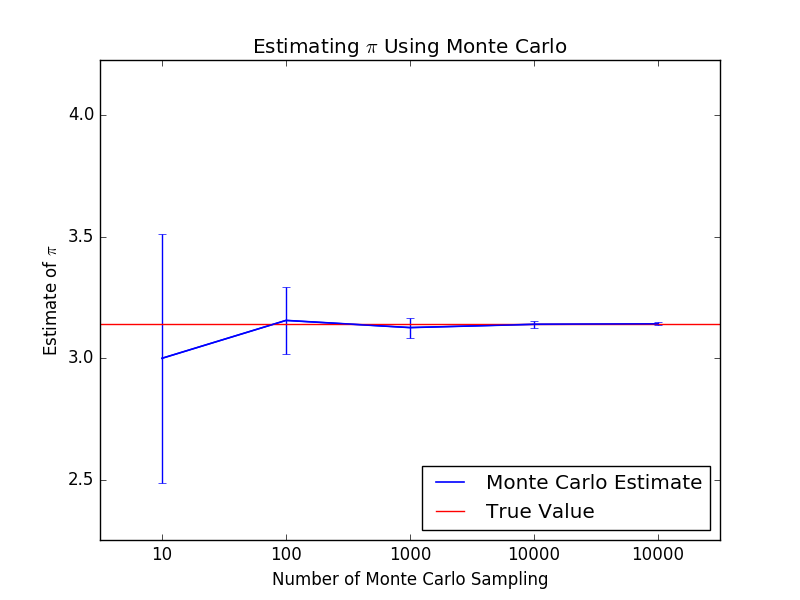

In [19]:
print"\n*****Question2c7*****\n"

import matplotlib.pyplot as plt
# clear figure 
plt.clf()
# figure out the max and min of y-axis should be 
tmax = max(n1[0]+n1[1],n2[0]+n2[1],n3[0]+n3[1],n4[0]+n4[1],n5[0]+n5[1])
tmin = min(n1[0]-n1[1],n2[0]-n2[1],n3[0]-n3[1],n4[0]-n4[1],n5[0]-n5[1])
# define a empty array and store changing region, mean+- sd. 
bound = np.empty((5,2))
for i in range(5):
        bound[i][0] = n[i][0] - n[i][1]
        bound[i][1] = n[i][0] + n[i][1]

# set the ylim and xlim
n_y =(n[0][0],n[1][0],n[2][0],n[3][0],n[4][0]) 
x= (1,2,3,4,5)
plt.ylim((tmin-0.5, tmax+0.5))
plt.xlim((1-0.5,5+0.5))
plt.locator_params(axis='x',nbins=6)
# create titile and labels
plt.title('Estimating $\pi$ Using Monte Carlo')
plt.xlabel('Number of Monte Carlo Sampling')
plt.ylabel('Estimate of $\pi$')
plt.plot(x,n_y,color="blue",linewidth=1.2,label="Monte Carlo Estimate")
plt.axhline(y=math.pi,color="red",label="True Value")
# set and draw error bound for pi
ysd=np.array(n[:,1])
plt.errorbar(x,n_y,yerr=ysd)
# draw the legend    
plt.legend(loc="lower right")

# label the value of x -axis
x_value=["10","100","1000","10000","10000"]
plt.xticks(x,x_value)

#plt.show()
plt.savefig('figure_1.png')
# store the image in hard drive and display the image 
from IPython.display import Image
Image('C:/Users/AERIE/Dropbox/Jungo/STSCI 4060/HW4/figure_1.png')


## 2D Bonus Problem (10 pts)

Plot 1000 sampling points like the following (only 20 points are shown below; believe me: 1000 points make a much prettier plot); try to reproduce as many features of the plot as possible.


*****Question2d*****



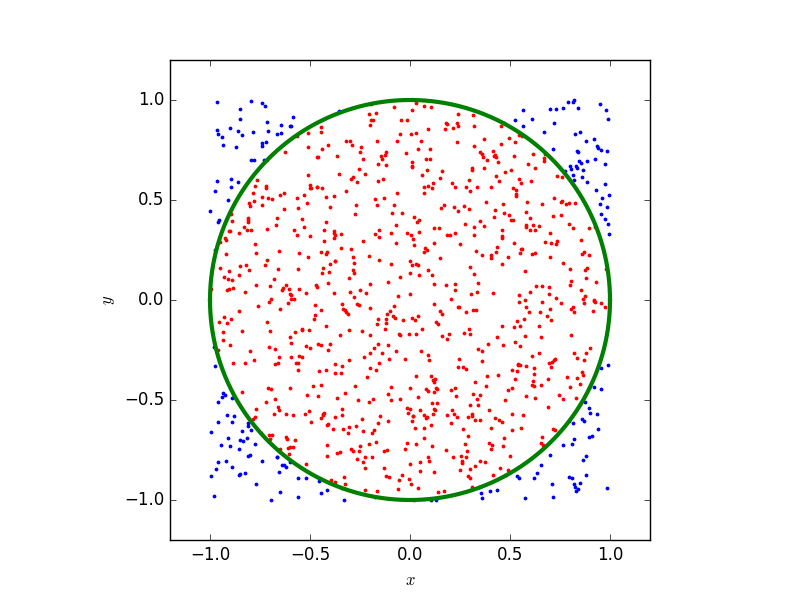

In [20]:
print"\n*****Question2d*****\n"

import matplotlib.pyplot as plt
# clear figure 
plt.clf()


# set the xlim and ylim
plt.ylim((-1-0.2, 1+0.2))
plt.xlim((-1-0.2,1+0.2))


# first and second quadrant by y=sqrt(1-x^2)
x_p=np.linspace(-1,1,10000)
y_p=np.sqrt(1-x_p**2)
plt.plot(x_p,y_p,'g-',linewidth=3)

#third and fourth quadrant by y=-sqrt(1-x^2)
x_n=-np.linspace(-1,1,10000)
y_n=-np.sqrt(1-x_n**2)
plt.plot(x_n,y_n,'g-',linewidth=3)


# sample 1000 points
n1000=get_xys(1000)

# check if points are in circle or not and use different color to represent them 
for i in range(1000):
    if (in_circle(n1000[i]) == True):
        plt.scatter(n1000[i][0],n1000[i][1],color='red',s=3)
    else:
        plt.scatter(n1000[i][0],n1000[i][1],color='blue',s=3)
# set the x and y labels
plt.xlabel('$x$')
plt.ylabel('$y$')
# show the graph with equal scale of x axis and y axis
plt.axes().set_aspect('equal')
# save figure
plt.savefig('figure_1-1.png')

# store the image in hard drive and display the image 
from IPython.display import Image
Image('C:/Users/AERIE/Dropbox/Jungo/STSCI 4060/HW4/figure_1-1.png')
